# Ⅰ. 첫번째 프로젝트 - 당뇨병 수치 맞추기

## 1. 데이터 가져오기

In [ ]:
from sklearn.datasets import load_diabetes        # 사이킷런으로부터 당뇨병(diabetes) 데이터를 가져오기 위한 구문

diabetes = load_diabetes()

In [ ]:
df_X = diabetes.data                    # data와 target을 받아온 후  
df_y = diabetes.target

print(df_X.shape)                       # 데이터가 어떤 형태로 이루어져있는지 간단히 확인해본다.
print(df_y.shape)

(442, 10)
(442,)


data를 df_x에, target을 df_y에 저장하였고, 데이터의 모양을 보아하니 442개의 데이터가 10가지의 정보를 담고 있는 데이터셋임을 알 수 있다.  


In [ ]:
for i,feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


우선 특성들을 살펴보니, 첫 번째 특성은 나이, 두 번째 특성은 성별, 세 번째 특성은 체지방 지수 등으로 구성되어 있음을 알 수 있다.  
참고로 나이는 사이킷런 사이트의 내용을 확인해보면 -0.2 ~ 0.2 사이에 분포하도록 조정을 하여 정상적인 나이 수치 대신 0.03807591라는 수치가 나오게 된다. 아래처럼 pandas 라이브러리를 가져와서 데이터 개형을 다시 확인해보자.

In [ ]:
import pandas as pd

diabetes_df = pd.DataFrame(data=df_X, columns=diabetes.feature_names)
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


Target 값이 포함된 형태로 데이터프레임 재출력했다.  맨 우측에 151, 75, 141, ... 해서 수치가 나오는 것을 확인할 수 있다. 아마 혈당 수치이지 않을까 싶다.

In [ ]:
diabetes_df['Target'] = diabetes.target      
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


## 2. 모델에 입력할 데이터 X와 y 준비하기

In [ ]:
import numpy as np

X = np.array(df_X)
y = np.array(df_y)
print(X)
print(y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

## 3.  Train, Test 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## 4. 모델 준비하기

조금 전에 pandas를 통해 구현해낸 자료를 확인해보니, 현재 이 당뇨병 데이터셋에서는 문자열이 적힌 부분이 없이 숫자로만 이루어져 있음을 알 수 있다. 때문에 이전 예제에서 나왔던 Tip을 구하는 문제에서처럼 더미 변수를 활용하는 과정을 생략해도 무방하며 따라서 Feature 항목은 그대로 10개이다. 이를 토대로 w와 b를 준비해보도록 하자.

In [ ]:
w = np.random.rand(10)
b = np.random.rand()
# Features 항목이 10가지가 있었기 때문에, w = np.random.rand 괄호 안에는 10이라고 작성하여 무작위로 w값을 추출해낸다.
# b의 값은 하나의 상수이기 때문에 괄호 안에 특정 숫자를 넣지 않고 하나의 값을 추출해낸다.

print(w)
print(b)

[0.46441226 0.53342726 0.05676631 0.42422322 0.02532881 0.51156387
 0.04421288 0.50935426 0.16810616 0.57789327]
0.1307048004060939


## 5. 손실함수 정의하기

손실함수란, 현재 모델이 얼마나 틀리고 있는지를 계산한 함수이다. 이 값을 줄이기 위해서는 손실함수에 입력된 x, y, w, b의 4가지 변수 중 w와 b 값에 집중해야 한다.
x와 y값은 이미 데이터셋에 주어진 데이터와 레이블이기에 수정이 불가능하지만 w,b는 수정이 가능하기 때문이다. 이렇게 수정이 가능한 변수를 "파라미터" 혹은 "가중치"라고 한다.

<img src = "https://drive.google.com/uc?id=1k5h4HQYQ6LiSD-NhZb3fxrqbHNlwHKsK" height=300, width=300>

위 그래프의 x축이 w이고, y축은 손실함수의 함숫값이다. 즉, 이 그래프가 바로 "w 값에 따른 손실함수" 그래프이다.

이미 그림에도 표시가 되어 있듯이, 우리가 정말 원하는 것은 손실함수의 값이 0이 되는 것, 아니면 최소한 0에 가까운 작은 값이 되는 것이다.
즉, 최적의 w는 빨간색으로 표시가 되어있는, 가장 작은 loss 값을 만들어내는 w 값이 된다.

하지만 우리는 처음부터 최적의 w를 알지 못하기 때문에, 랜덤으로 w를 아무렇게나 선택할 수밖에 없었고, 결과적으로 파란색에 위치한 것처럼 현재의 loss 값은 매우 큰 상황이다.  

<img src = "https://drive.google.com/uc?id=1Rpa-THl1BLmelQn7_dL4iBrYKaPzPNFD" height=300, width=300>

위 그림과 같이 두 가지 상황을 생각해 볼 수 있다.

1) 만약 현재의 w가 최적의 w의 왼쪽에 위치하고 있다면 현재의 w가 최적의 w보다 작다는 의미이므로 우리는 현재의 w가 커지도록 늘려야 한다.
2) 반대로 오른쪽에 위치하고 있다면 현재의 w 값이 최적의 w 값보다 크다는 의미이므로 현재의 w가 작아지도록 줄여야 한다.

하지만, 우리는 최적의 w 값이 무엇인지를 모르기 때문에, 현재 w 값 또한 최적의 w보다 큰지 혹은 작은지를 알 수 없다. 그래서 사용하게 될 개념이 바로 그 유명한 "기울기", 혹은 "그래디언트" 라고 불리는 친구를 사용하는 것이죠.

위 그림의 왼쪽 점과 오른쪽 점에서 각각 기울기를 그려보도록 하자.

<img src = "https://drive.google.com/uc?id=1JmP206t_qt9QN2SPB9kcWQchkyxl9ShM" height=300, width=300>

1) 왼쪽 점은 자기 자신의 위치보다 오른쪽으로 갈수록 손실함수값이 점점 작아지기 때문에 그 점에서 그린 접선은 오른쪽 아래로 향하는 방향 이고, 그 기울기는 음수.

2) 오른쪽 점은 자기 자신의 위치보다 왼쪽으로 갈수록 손실함수값이 점점 작아지기 때문에 그 점에서 그린 접선은 왼쪽 아래로 향하는 방향이고, 그 기울기는 양수.

현재 w에서의 기울기를 구한다.
기울기가 음수라면, 현재 w를 키운다.
기울기가 양수라면, 현재 w를 줄인다.

In [ ]:
def model (X, w, b):
  predictions = 0
  for i in range(10):
    predictions += X[:, i] * w[i]
  predictions += b
  return predictions

def MSE(a, b):
  mse = ((a - b) ** 2).mean()            # 두 값의 차이의 제곱의 평균
  return mse

def loss(X, w, b, y):
  predictions = model(X, w, b)
  L = MSE(predictions, y)
  return L

## 6. 기울기를 구하는 gradient 함수 구현하기

기울기를 구하는 함수를 구현하려면 def를 통해 gradient 함수를 정의하여 dw, db를 구하는 공식을 적은 후 그 값을 반환하면 된다. 그리고 난 다음 그 결과값을 프린트하면 우리가 원하는 기울기 값을 구할 수 있다.

In [ ]:
def gradient(X, w, b, y):
  N = len(w)

  y_pred = model(X, w, b)

  dw = 1/N * 2 * X.T.dot(y_pred - y)
  db = 2 * (y_pred - y).mean()
  return dw, db

In [ ]:
dw, db = gradient(X, w, b, y)
print("dw:", dw)
print("db:", db)

dw: [ -60.60680981  -13.72444975 -189.68873216 -142.69889258  -68.39208953
  -56.08600416  127.63103668 -139.06109336 -182.96622281 -123.55413006]
db: -304.00555872497966


기울기 dw를 구해보니, 대부분 음수가 나온 것을 알 수 있다. 즉 조금 전 이미지에 나왔던 2차함수 형태의 손실함수를 기준으로 왼쪽에 있음을 알 수 있다.

## 7. 하이퍼 파라미터인 학습률 설정하기

학습률, learning rate를 0.001 정도로 맞춰보겠다.
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보고자 한다.  
최종적으로는 0.2로 학습률을 조정했을 때 가장 성능이 좋은 모델 지표를 얻을 수 있었던 거 같다.

In [ ]:
LEARNING_RATE = 0.2

## 8. 모델 학습하기

In [ ]:
losses = []
for i in range(1, 1001):
  dw, db = gradient(X_train, w, b, y_train)
  w -= LEARNING_RATE * dw
  b -= LEARNING_RATE * db
  L = loss(X_train, w, b, y_train)
  losses.append(L)
  if i % 10 == 0:
    print('Iteration %d : Loss %0.4f' % (i,L))

Iteration 10 : Loss 3640.9558
Iteration 20 : Loss 3224.0255
Iteration 30 : Loss 3064.3143
Iteration 40 : Loss 2986.9671
Iteration 50 : Loss 2947.1974
Iteration 60 : Loss 2926.0618
Iteration 70 : Loss 2914.4743
Iteration 80 : Loss 2907.9099
Iteration 90 : Loss 2904.0584
Iteration 100 : Loss 2901.7116
Iteration 110 : Loss 2900.2221
Iteration 120 : Loss 2899.2341
Iteration 130 : Loss 2898.5469
Iteration 140 : Loss 2898.0445
Iteration 150 : Loss 2897.6582
Iteration 160 : Loss 2897.3461
Iteration 170 : Loss 2897.0824
Iteration 180 : Loss 2896.8508
Iteration 190 : Loss 2896.6408
Iteration 200 : Loss 2896.4457
Iteration 210 : Loss 2896.2607
Iteration 220 : Loss 2896.0831
Iteration 230 : Loss 2895.9108
Iteration 240 : Loss 2895.7423
Iteration 250 : Loss 2895.5769
Iteration 260 : Loss 2895.4138
Iteration 270 : Loss 2895.2527
Iteration 280 : Loss 2895.0931
Iteration 290 : Loss 2894.9350
Iteration 300 : Loss 2894.7782
Iteration 310 : Loss 2894.6226
Iteration 320 : Loss 2894.4680
Iteration 330 : L

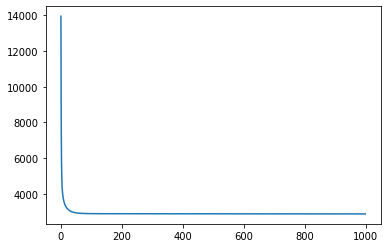

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

모델을 학습할 때 한가지 느낀 것은 학습 효율(learning rate)를 변경할 때 모델 준비하기 과정의 w, b를 랜덤으로 추출하는 과정부터 다시 돌려야 정상적으로 출력된다는 점이다. 만약 이 과정을 생략하고 학습 효율만 변경하여 모델을 학습시키게 되면 손실이 급격하게 줄어드는 위와 같은 그래프가 정상적으로 나오지 않게 되므로 유의해야 한다.

## 9, test 데이터에 대한 성능 확인



In [ ]:
w, b

(array([  41.50331324, -240.57542311,  554.93543264,  343.70583831,
        -284.92134025,   11.48373404, -127.39571198,  184.84932515,
         488.78693722,   53.2914429 ]), 151.31262193858365)

In [ ]:
prediction = model(X_test, w, b)
mse = loss(X_test, w, b ,y_test)
mse

2886.21697739687

## 10. 정답 데이터와 예측한 데이터 시각화

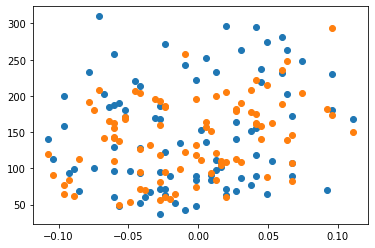

In [ ]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

결론 : 실제 y 결과값은 x값에 따라 양의 상관관계인지 음의 상관관계인지 불분명하다. 이처럼 상관관계가 불분명한 상태에 산점도를 그렸을 때는 단지 정답 데이터와 예측한 데이터가 어느 정도 비슷한 분포를 보이는가, 즉 컴퓨터가 어느 정도 정답을 맞췄는가 정도밖에는 알 수가 없다는 것을 이 산점도를 통해 느낄 수 있었다.

# Ⅱ. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## 1. 데이터 가져오기

자전거 관련 데이터는 kaggle에도 있기 때문에 현재 사용중인 구글 colab과 kaggle의 연동 과정을 통해 데이터를 불러오는 과정을 먼저 진행하였다.

In [ ]:
# 토큰 파일 업로드를 먼저 진행
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"xpelqpdj0422","key":"2edebe6c02209895e8d7e00e69b72f16"}'}

In [ ]:
# ls -1ha kaggle.json
# 파일이 잘 업로드 되었는지 확인을 하기 위해서 위에 적힌 코드를 실행했을때 파일명이 제대로 뜬다면 성공.
# "kaggle.json"이라고 출력이 되었다.
# kaggle.json을 중복 다운 받게 되면 오류가 날 수도 있다.

In [ ]:
# Kaggle API를 사용하기 위해 json파일을 ~/.kaggle로 이동시키는 작업이 필요하다.

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.

!chmod 600 ~/.kaggle/kaggle.json
# 내가 참가한 대회 리스트 확인

!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         53           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         98           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        617           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        125           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1251           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      15237           False  
house-pr

In [ ]:
! kaggle competitions download -c bike-sharing-demand     # API를 복사 붙여넣기 하여 파일 다운로드 진행

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls           # 압축 파일의 목록 확인

 bike-sharing-demand.zip  'kaggle (1).json'   sample_data	     test.csv
 drive			   kaggle.json	      sampleSubmission.csv   train.csv


In [ ]:
!unzip bike-sharing-demand.zip               # 해당 파일의 압축을 푸는 과정(unzip)

Archive:  bike-sharing-demand.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.shape,  test.shape

((10886, 12), (6493, 9))

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [ ]:
test['datetime'] = pd.to_datetime(test['datetime'])

In [ ]:
train['datetime'].dt.year # 연도 정보

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

* 시간 데이터 처리 관련 블로그 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=wideeyed&logNo=221603462366  
* 자료를 참고하여 컬럼에 훈련 세트와 테스트 세트에 연, 월, 일, 시간, 분, 초에 관한 6개의 컬럼을 추가하였다. 그리고 train을 확인해보면 실제로 count 뒤에 연, 월, 일, 시간, 분, 초에 해당하는 6개의 컬럼이 생성되었다.

In [ ]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [ ]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,0


## 3. year, month, day, hour, minute, second 데이터 개수 시각화하기

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

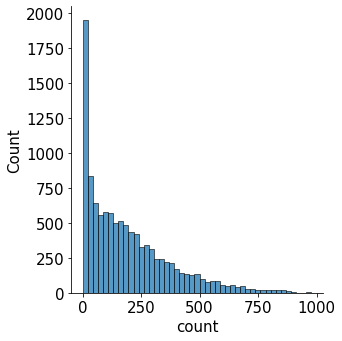

In [ ]:
mpl.rc('font', size=15)        # 폰트 크기를 15로 설정 
sns.displot(train['count']);   # 분포도 출력

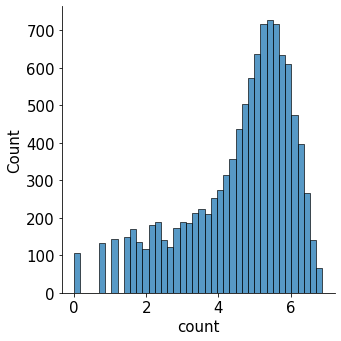

In [ ]:
import numpy as np

sns.displot(np.log(train['count']));

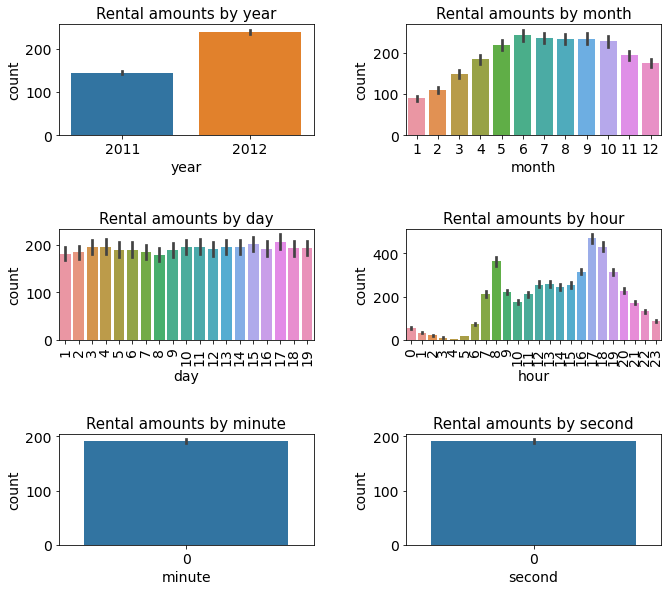

In [ ]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=14)       # 폰트 크기 설정
mpl.rc('axes', titlesize=15)  # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성 
plt.tight_layout()            # 그래프 사이에 여백 확보 
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10x9인치로 설정 

# 스텝 2 : 각 축에 서브플롯 할당
# 각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

# 3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

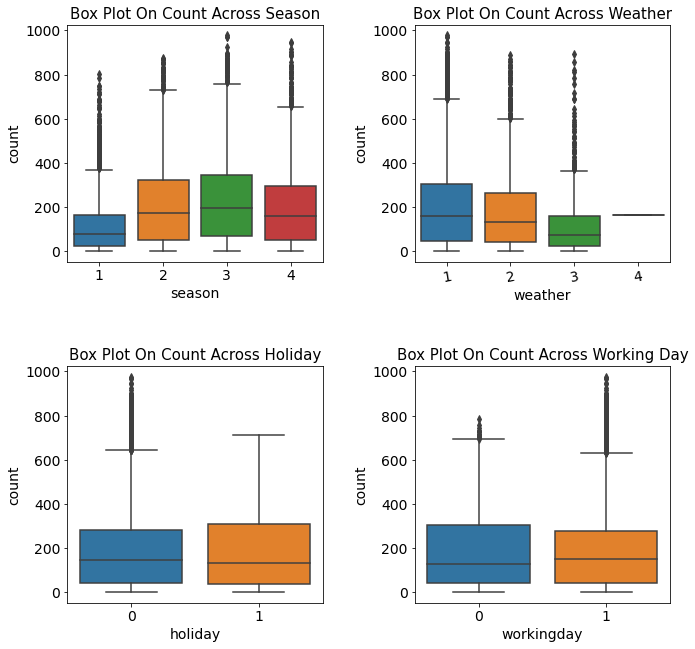

In [ ]:
# 스텝 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 스텝 2 : 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3-2 : x축 라벨 겹침 해결
axes[0, 1].tick_params('x', labelrotation=10) # 10도 회전

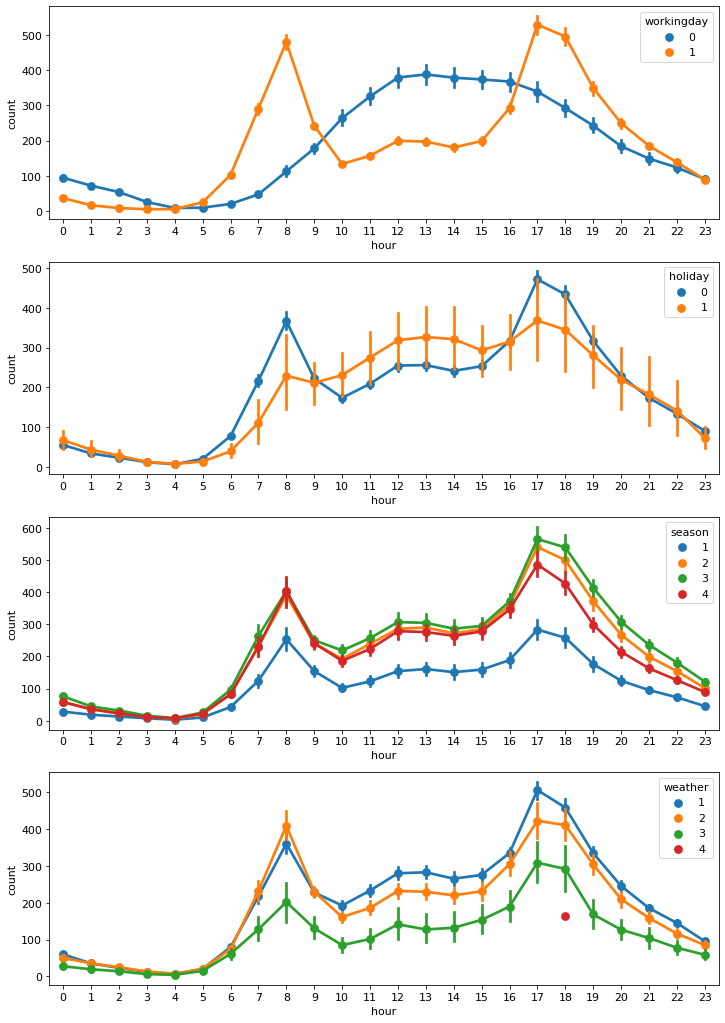

In [ ]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=4) # 4행 1열
figure.set_size_inches(12, 18)

# 스텝 2 : 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[3]);

In [ ]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012,12,31,19,0,0
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012,12,31,20,0,0
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012,12,31,21,0,0
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012,12,31,22,0,0


In [ ]:
# 습도에 관해서만 자전거 대여량과 어떤 관계가 있는지를 알고 싶어서 습도 제외한 모든 feature를 drop하였다.
drop_features = ['datetime', 'season', 'holiday', 'workingday', 'temp', 'atemp', 'weather','windspeed', 'casual', 'registered', 'year', 'month', 'day', 'hour', 'minute', 'second']
drop_features_2 = ['datetime', 'season', 'holiday', 'workingday', 'temp', 'atemp', 'weather', 'windspeed', 'year', 'month', 'day', 'hour', 'minute', 'second']

train = train.drop(drop_features, axis=1)     # 드롭된 피처 제외하고 남아 있는 피처 재할당
test = test.drop(drop_features_2, axis=1)

all_data = all_data.drop(drop_features, axis=1)

In [ ]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

,humidity,count
0,81,16.0
1,80,40.0
2,80,32.0
3,75,13.0
4,75,1.0
...,...,...
17374,60,NaN
17375,60,NaN
17376,60,NaN
17377,56,NaN


## 4. X, y 컬럼 선택 및 train/test 데이터 분리

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# 데이터 나누기. 이 경우는 이미 훈련 세트와 테스트 세트가 분리가 되었기 때문에 이를 참고하였다.
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값 count 제거. 자전거 대여량이 타깃값이다. 아직 남아 있기 때문에 drop하고
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값 count를 새로 지정하였다.

In [ ]:
print(X_train.shape, X_test.shape)     
# 훈련 세트 열과 테스트 세트의 열이 같은 2차원 형태의 배열이어야만 사이킷런의 모델을 돌릴 수 있다!!!
# 배열이 맞는지 확인!!

(10886, 1) (6493, 1)


## 5. LinearRegression(선형 회귀) 모델 학습

In [ ]:
lr= LinearRegression()

In [ ]:
log_y = np.log(y)
lr.fit(X_train, y)        # 모델 훈련

LinearRegression()

## 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [ ]:
print(lr.coef_, lr.intercept_)       # count를 결정짓는 특성들 중 humidity에 대한 선형 방정식의 coef(기울기)와 intercept(y절편) 값을 프린트하는 과정

[-2.98726858] 376.44560833036303


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y, preds)
rmse = sqrt(mean_squared_error(y, preds))

print(mse)
print(rmse)

29505.492830643656
171.77162987712393


## 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

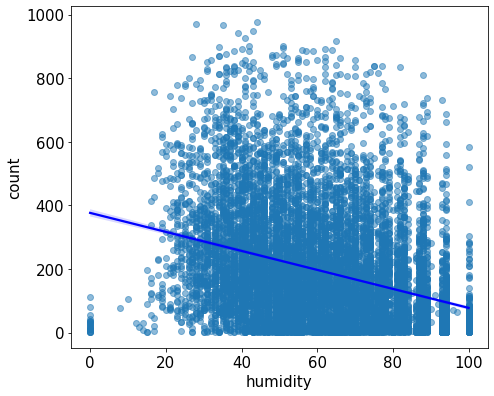

In [ ]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=1, ncols=1)
plt.tight_layout()
figure.set_size_inches(7, 6)

# 스텝 2 : 서브플롯 할당
# 온도(temp), 체감 온도(atemp), 풍속(windspeed), 습도 별 대여 수량 산점도 그래프
sns.regplot(x='humidity', y='count', data=train,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'blue'});

# alpha 값으로 산점도 내 점의 투명도를 조절할 수 있다.
# 0으로 갈수록 산점도 내 점이 투명해지고 1로 갈수록 선명해진다.(따라서 0과 1 사이의 값만 넣을 수 있다.)

결론 : 이 자전거 수요량 예측에 관한 경우는 그대로 따라치면서 어느 정도 예측이 가능했던 당뇨병과는 달리 직접 선형 모델을 표현할 줄 알아야 해서 시간이 너무 오래 걸리게 되었다.
lr.coef와 lr.intercept를 통해 선형 회귀가 어떤 식으로 돌아가는지 대강 감을 잡게 되었던 거 같다.

# 총론

당뇨병 데이터와 자전거 수요 예측 데이터를 통해 손실함수가 어떤 식으로 구현이 되는지를 배울 수 있었다. 굉장히 어려운 개념이고 이를 모델링하는 것도 쉽지 않았으나, 머신러닝에서 굉장히 중요하게 적용되는 개념이라는 것을 알게 되었다.  
자전거 수요 예측 데이터에 관한 모델을 작성하면서 중요한 사실을 알게 된 것이 있어 여기에 기록해 보고자 한다. 그것은 타겟값에 영향을 미치는 여러 가지 변수들이 있는데, 이 중에 어떤 변수만 남기고 어떤 변수를 없애줘야 선형 회귀 모델을 구현해 낼 수 있을까를 논리적으로 생각해야 한다는 것이다. 그것을 통해서 rmse 및 rmsle의 목표치를 찾아가는 것이 kaggle 필사의 진짜 의미가 아닐까하는 생각도 들었다. 물론 이것은 Exploration이지만 kaggle과도 연관을 시킬 수 있기 때문에 보다 열심히 공부해야겠다.
